## new library
- sympy : symbolic math calculation

## things to ponder
- how normalization impact the weight optimization process
- dividing by n_hidden for weights is not clear

# Titanic Data

In [36]:
import pandas as pd
import numpy as np 
import os
import torch 
from torch import tensor

In [48]:
df = pd.read_csv("train.csv")

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
# it return multiple values when there is tie
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [52]:
df.fillna(modes,inplace=True)

In [53]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [54]:
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

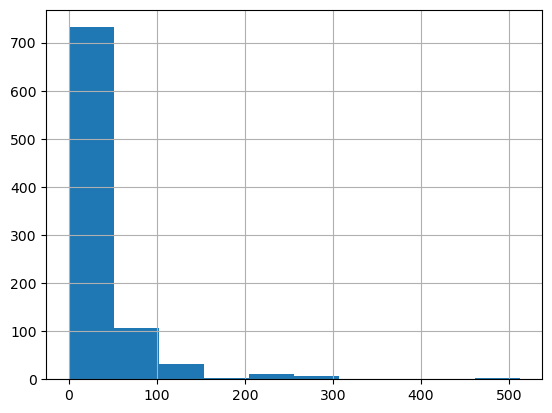

In [55]:
df.Fare.hist()

In [56]:
df['logfare'] = np.log(df.Fare+1)

<Axes: >

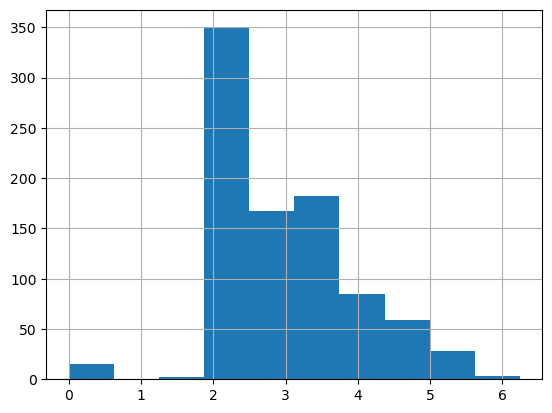

In [57]:
df.logfare.hist()

In [58]:
pclasses = sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [59]:
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [60]:
df = pd.get_dummies(df,columns=['Sex','Pclass','Embarked'],dtype=int)

In [61]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'logfare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [62]:
added_columns = ['Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [63]:
df[added_columns].head()

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,1,0,0,0,0,1
4,0,1,0,0,1,0,0,1


In [64]:
t_dep = tensor(df.Survived)

In [65]:
indep_cols = ['Age', 'SibSp', 'Parch', 'logfare'] + added_columns

In [66]:
t_indep = tensor(df[indep_cols].values,dtype=torch.float)

In [67]:
t_indep.shape

torch.Size([891, 12])

In [69]:
val,index = t_indep.max(dim=0)
t_indep = t_indep/val

In [72]:
torch.manual_seed(442)
weights = torch.rand(t_indep.shape[1])-0.5
weights

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625])

In [73]:
preds = (t_indep*weights).sum(axis=1)

In [75]:
preds[:10]

tensor([ 0.1412, -0.5725,  0.1494,  0.2571,  0.0453, -0.0448,  0.0792,  0.2961,
         0.2128, -0.5770])

In [76]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.5200)

In [77]:
def cal_pred(weights,t_indep): return (t_indep*weights).sum(axis=1)
def cal_loss(weights,t_indep,t_dep) : return torch.abs(cal_pred(weights,t_indep)-t_dep).mean()

In [78]:
weights.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [79]:
loss = cal_loss(weights,t_indep,t_dep)
loss

tensor(0.5200, grad_fn=<MeanBackward0>)

In [82]:
loss.backward()

In [83]:
weights.grad

tensor([-0.0483,  0.0118, -0.0041, -0.0804, -0.1975,  0.1111, -0.1235, -0.0426,
         0.0797, -0.1886, -0.0617,  0.1639])

In [84]:
with torch.no_grad():
    weights.sub_(weights.grad*0.1)
    print(cal_loss(weights,t_indep,t_dep))

tensor(0.5056)


In [85]:
from fastai.data.transforms import RandomSplitter
trn_split, valid_split  = RandomSplitter(seed=42)(df)

In [87]:
trn_indep, val_indep = t_indep[trn_split], t_indep[valid_split]
trn_dep, val_dep = t_dep[trn_split],t_dep[valid_split]

In [89]:
def update_coeff(weights,lr): return weights.sub_(weights.grad*0.1)

In [93]:
def one_epoch(weights,lr):
    loss = cal_loss(weights,trn_indep,trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeff(weights,lr)
    print(f"loss:{loss:.3f};")

In [98]:
def init_coeff(n_coeff) : return (torch.rand(n_coeff)-0.5).requires_grad_()

In [99]:
def train_model(n_coeff, epoch=30, lr=0.1):
    torch.manual_seed(442)
    weights = init_coeff(n_coeff)
    for i in range(epoch):  one_epoch(weights,lr)
    return weights

In [101]:
weights = train_model(t_indep.shape[1],10,0.1)

loss:0.518;
loss:0.504;
loss:0.480;
loss:0.449;
loss:0.399;
loss:0.351;
loss:0.307;
loss:0.293;
loss:0.315;
loss:0.363;


In [102]:
def show_coeff() : return dict(zip(indep_cols,weights.requires_grad_(False)))

In [103]:
show_coeff()

{'Age': tensor(-0.1332),
 'SibSp': tensor(0.0675),
 'Parch': tensor(0.2445),
 'logfare': tensor(0.2081),
 'Sex_female': tensor(0.5610),
 'Sex_male': tensor(-0.4620),
 'Pclass_1': tensor(0.9443),
 'Pclass_2': tensor(0.4502),
 'Pclass_3': tensor(0.3636),
 'Embarked_C': tensor(0.4254),
 'Embarked_Q': tensor(0.3508),
 'Embarked_S': tensor(0.0345)}

In [106]:
preds = cal_pred(weights,val_indep)
results = val_dep.bool()==(preds>0.5)
results[:10]

tensor([True, True, True, True, True, True, True, True, True, True])

In [107]:
def cal_acc(weights) : return ( val_dep.bool()==(cal_pred(weights,val_indep)>0.5)).float().mean()

In [108]:
cal_acc(weights) 

tensor(0.7640)

In [109]:
preds[:20]

tensor([ 1.4085,  0.2848,  0.3573,  0.1364,  0.0690,  0.0776,  1.4731,  1.0870,
         0.1872,  1.4643, -0.0442,  0.4292,  0.0619,  1.3083, -0.0534,  0.5524,
         0.5191,  1.1547,  0.0676,  0.9832])

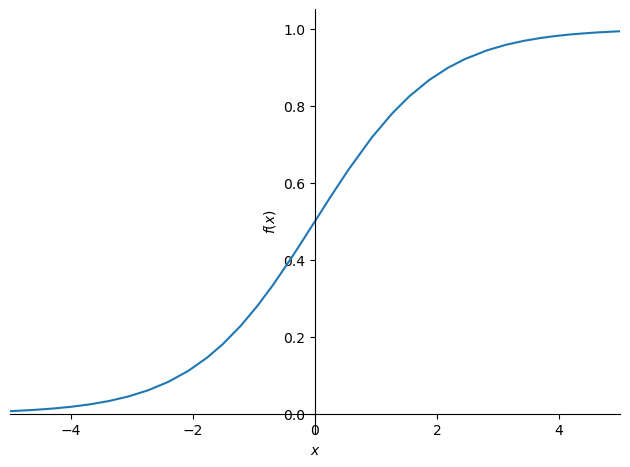

In [110]:
import sympy
sympy.plot("1/(1+exp(-x))",xlim=(-5,5))

In [128]:
def cal_pred(weights,t_indep): return torch.sigmoid((t_indep*weights).sum(axis=1))

In [129]:
weights = train_model(len(indep_cols),20,0.1)

loss:0.503;
loss:0.501;
loss:0.497;
loss:0.490;
loss:0.482;
loss:0.471;
loss:0.459;
loss:0.445;
loss:0.430;
loss:0.415;
loss:0.399;
loss:0.384;
loss:0.370;
loss:0.358;
loss:0.346;
loss:0.336;
loss:0.328;
loss:0.321;
loss:0.314;
loss:0.309;


In [130]:
cal_acc(weights)

tensor(0.7079)

In [131]:
show_coeff()

{'Age': tensor(-0.8473),
 'SibSp': tensor(0.0566),
 'Parch': tensor(0.2316),
 'logfare': tensor(-0.4314),
 'Sex_female': tensor(0.5792),
 'Sex_male': tensor(-2.0885),
 'Pclass_1': tensor(0.7963),
 'Pclass_2': tensor(0.2891),
 'Pclass_3': tensor(-0.9358),
 'Embarked_C': tensor(-0.3155),
 'Embarked_Q': tensor(0.1339),
 'Embarked_S': tensor(-0.6161)}

In [138]:
tst_df = pd.read_csv("test.csv")
tst_df.Fare = tst_df.Fare.fillna(0)
tst_df.fillna(modes,inplace=True)
tst_df['logfare'] = np.log(tst_df.Fare+1)
tst_df = pd.get_dummies(tst_df, columns=['Sex','Pclass','Embarked'],dtype=int)

tst_tens = tensor(tst_df[indep_cols].values,dtype=torch.float)
tst_tens = tst_tens/val

In [142]:
tst_df['Survived'] = (cal_pred(weights,tst_tens)>0.5).int()

In [145]:
sub_df = tst_df[['PassengerId','Survived']]
sub_df.to_csv('submission.csv')

In [146]:
def cal_pred(weights,t_indep) : return torch.sigmoid(t_indep@weights)

In [147]:
def init_coeff(n_coeff): return (torch.rand(n_coeff,1)*0.1).requires_grad_()

In [148]:
init_coeff(len(indep_cols))

tensor([[0.0672],
        [0.0732],
        [0.0142],
        [0.0499],
        [0.0317],
        [0.0259],
        [0.0549],
        [0.0587],
        [0.0447],
        [0.0813],
        [0.0351],
        [0.0245]], requires_grad=True)

In [149]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [152]:
weights = train_model(len(indep_cols),lr=2)

loss:0.512;
loss:0.510;
loss:0.505;
loss:0.499;
loss:0.490;
loss:0.479;
loss:0.467;
loss:0.452;
loss:0.436;
loss:0.419;
loss:0.402;
loss:0.385;
loss:0.369;
loss:0.355;
loss:0.342;
loss:0.331;
loss:0.322;
loss:0.314;
loss:0.308;
loss:0.302;
loss:0.297;
loss:0.292;
loss:0.288;
loss:0.284;
loss:0.280;
loss:0.276;
loss:0.272;
loss:0.268;
loss:0.264;
loss:0.260;


In [153]:
cal_acc(weights)

tensor(0.7921)

In [190]:
def init_coeff(n_coeff,n_hidden=20):
    layer1 = (torch.rand(n_coeff,n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden,1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [191]:
import torch.nn.functional as F

In [192]:
def cal_pred(weights,indpen):
    l1,l2,c = weights
    res = F.relu(indpen@l1)
    res = res@l2+c
    return F.sigmoid(res)

In [193]:
def update_coeff(weights,lr):
    for layer in weights: layer.sub_(layer.grad*lr)

In [194]:
weights = train_model(len(indep_cols),lr =1.4)

loss:0.544;
loss:0.533;
loss:0.511;
loss:0.467;
loss:0.392;
loss:0.302;
loss:0.252;
loss:0.225;
loss:0.209;
loss:0.203;
loss:0.201;
loss:0.200;
loss:0.196;
loss:0.193;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;


In [195]:
cal_acc(weights)

tensor(0.8258)

## Deep learning :::P

In [204]:
def init_coeff(n_coeff):
    hidden_layers = [10,10]
    size = [n_coeff] + hidden_layers + [1]
    n = len(size)
    layers = [(torch.rand(size[i],size[i+1])-0.3)/size[i+1]*4  for i in range(n-1)]
    constants = [torch.rand(1)[0]-0.5 for i in range(n-1)]
    for coeff in layers+constants : coeff.requires_grad_()
    return layers, constants

In [208]:
def cal_pred(coeffs,indep):
    layers, constants = coeffs
    n = len(layers)
    res = indep
    for i in range(n):
        res = res@layers[i] + constants[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [209]:
def update_coeff(coeffs,lr):
    layers, constants = coeffs
    for coeff in layers+constants : coeff.sub_(coeff.grad*lr)

In [210]:
coeffs = train_model(len(indep_cols),lr=1)

loss:0.536;
loss:0.400;
loss:0.368;
loss:0.357;
loss:0.329;
loss:0.315;
loss:0.300;
loss:0.264;
loss:0.212;
loss:0.196;
loss:0.196;
loss:0.196;
loss:0.193;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.192;
loss:0.190;
loss:0.206;
loss:0.191;
loss:0.192;
loss:0.192;


In [212]:
cal_acc(coeffs)

tensor(0.8258)